<h1 align="center">Uczenie nadzorowane - klasyfikacja</h1>
<h2 align="center">Dominik Sakłaski, 415120</h2>


#### Wczytanie bibliotek

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt

#### 1. Wczytaj zbiór danych

`Opis kolumn zbioru:`

- **Class**  
  Typ wina (1, 2, 3) –  oznacza odmiane winogron, z których pochodzi próbka wina
- **Alcohol**  
  Zawartość alkoholu - rocentowy udział alkoholu w winie.
- **Malic acid**  
  Kwas jabłkowy – ilość kwasu jabłkowego  w winie
- **Ash**  
  Popiół – ilość pozostałości po spaleniu próbki wina
- **Alcalinity of ash**  
  Zasadowość popiołu – miara zdolności popiołu do neutralizacji kwasów
- **Magnesium**  
  Magnezs– Zawartość magnezu w winie
- **Total phenols**  
  Fenole ogółem – Całkowita ilość związków fenolowych w winie
- **Flavanoids**  
  Flawonoidy – podgrupa fenoli w winie
- **Nonflavanoid phenols**  
  Fenole niefalwonoidowe – pozostałe fenole, które nie są flawonoidami w winie
- **Proanthocyanins**  
  Proantocyjanidyny – związki nadające winu cierpkość i barwę
- **Color intensity**  
  Intensywność barwy – określa, jak intensywny jest kolor wina
- **Hue**  
  Odcień – wskazuje na „tonację” koloru wina
- **OD280/OD315 of diluted wines**  
  Stosunek absorbancji OD280/OD315 – biochemiczna cecha opisująca właściwości fenolowe wina, oparta na absorpcji światła
- **Proline**  
  Prolina – aminokwas naturalnie występujący w winie

In [2]:
columns = [
    'Class',
    'Alcohol',
    'Malic acid',
    'Ash',
    'Alcalinity of ash',
    'Magnesium',
    'Total phenols',
    'Flavanoids',
    'Nonflavanoid phenols',
    'Proanthocyanins',
    'Color intensity',
    'Hue',
    'OD280/OD315 of diluted wines',
    'Proline'
]

In [3]:
df = pd.read_csv('Dane/wine.data',header=None,names=columns)
df

Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0        1    14.23        1.71  2.43               15.6        127   
1        1    13.20        1.78  2.14               11.2        100   
2        1    13.16        2.36  2.67               18.6        101   
3        1    14.37        1.95  2.50               16.8        113   
4        1    13.24        2.59  2.87               21.0        118   
..     ...      ...         ...   ...                ...        ...   
173      3    13.71        5.65  2.45               20.5         95   
174      3    13.40        3.91  2.48               23.0        102   
175      3    13.27        4.28  2.26               20.0        120   
176      3    13.17        2.59  2.37               20.0        120   
177      3    14.13        4.10  2.74               24.5         96   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0             2.80        3.06                  0.28             2.29   
1             2.65        2.76                  0.26             1.28   
2             2.80        3.24                  0.30             2.81   
3             3.85        3.49                  0.24             2.18   
4             2.80        2.69                  0.39             1.82   
..             ...         ...                   ...              ...   
173           1.68        0.61                  0.52             1.06   
174           1.80        0.75                  0.43             1.41   
175           1.59        0.69                  0.43             1.35   
176           1.65        0.68                  0.53             1.46   
177           2.05        0.76                  0.56             1.35   

     Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0               5.64  1.04                          3.92     1065  
1               4.38  1.05                          3.40     1050  
2               5.68  1.03                          3.17     1185  
3               7.80  0.86                          3.45     1480  
4               4.32  1.04                          2.93      735  
..               ...   ...                           ...      ...  
173             7.70  0.64                          1.74      740  
174             7.30  0.70                          1.56      750  
175            10.20  0.59                          1.56      835  
176             9.30  0.60                          1.62      840  
177             9.20  0.61                          1.60      560  

[178 rows x 14 columns]

#### 2. Podziel zbiór danych na zbiór treningowy i testowy, dodatkowo w zmiennej X zapisz macierz zmiennych niezależnych, w zmiennej Y zapisz wektor zawierający informacje o tym jaki jest to typ wina (1, 2, 3).

In [4]:
X = df.drop('Class', axis=1)
Y = df['Class']

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.20,
    random_state=1020,
    stratify=Y
)
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",Y_train.shape)
print("y_test shape:",Y_test.shape)

X_train shape: (142, 13)
X_test shape: (36, 13)
y_train shape: (142,)
y_test shape: (36,)


#### 3. Dokonaj normalizacji danych. Skomentuj po co jest ten krok i jak może on wpływać na działania algorytmów z kolejnego punktu.

`StandardScaler` to metoda normalizacji danych, która przekształca każdą cechę tak, aby miała średnią 0 i odchylenie standardowe 1. Dzięki temu wszystkie cechy mają tę samą skalę, niezależnie od jednostek i zakresów wartości.

W praktyce dla każdej cechy obliczana jest jej średnia i odchylenie standardowe na zbiorze treningowym. Następnie każda wartość tej cechy jest przekształcana według wzoru:  **nowa_wartość = (stara_wartość - średnia) / odchylenie_standardowe**

Pozwala to uniknąć sytuacji, w której cechy o większych wartościach liczbowych mają nieproporcjonalnie duży wpływ na model, szczególnie w algorytmach opartych na odległości (np. KNN).

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**KOMENTARZ:**

Normalizacja chroni przed „przewagą” pojedynczych cech o dużych wartościach liczbowych i pozwala uzyskać bardziej wiarygodne oraz powtarzalne wyniki klasyfikacji. Normalizacja sprawia, że **wszystkie cechy mają podobną wagę i wpływ na obliczenia odległości**, dzięki czemu model lepiej uczy się rzeczywistych zależności w danych.

- Normalizacja danych (np. standaryzacja cech za pomocą StandardScaler) jest kluczowa w analizie danych i uczeniu maszynowym, zwłaszcza gdy korzystamy z algorytmów opartych na odległościach (np. K-Nearest Neighbors, SVM, PCA).  
Bez normalizacji cechy o większych wartościach (np. Proline) dominowałyby nad pozostałymi i mogłyby zaburzyć działanie modelu – algorytm uznawałby je za ważniejsze tylko dlatego, że mają większą skalę liczbową, a nie rzeczywisty wpływ na klasyfikację.  

- Dla algorytmów drzewiastych (np. RandomForestClassifier) normalizacja nie jest wymagana, ponieważ te modele są niewrażliwe na skalę cech – każde drzewo rozdziela dane na podstawie progów, a nie odległości.  
Jednak zastosowanie tej samej wersji danych do wszystkich modeli ułatwia bezpośrednie porównanie ich wyników oraz późniejszą interpretację.


#### 4. Wykonaj trening dla algorytmów KNeighborsClassifier oraz RandomForestClassifier (biblioteka scikit-learn).

**KNeighborsClassifier (KNN):**
- algorytm klasyfikacji oparty na zasadzie „głosowania sąsiadów”
- dla każdej nowej próbki znajduje k najbliższych punktów (sąsiadów) w przestrzeni cech (po normalizacji!).
- klasa, która pojawia się najczęściej wśród tych sąsiadów, zostaje przypisana próbce.

W praktyce:
- Obliczamy odległości do wszystkich punktów treningowych (najczęściej euklidesowa, domyślnie). Euklidesowa jest domyślna, bo jest najprostsza, najbardziej intuicyjna i uniwersalna dla ciągłych, liczbowych, znormalizowanych danych. Wzór: $$ d(x, y) = \sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2 + \ldots + (x_n - y_n)^2}$$
,czyli suma kwadratów różnic dla wszystkich cech, potem pierwiastek.
- wybieramy k najbliższych (najmniejsza odległość).
- sprawdzamy, która klasa jest najczęstsza wśród sąsiadów – i taką zwracamy.

Najważniejsze parametry:
* n_neighbors – liczba sąsiadów - im więcej sąsiadów, tym model jest mniej czuły na szum, ale może być mniej dokładny dla złożonych danych.
* metric – rodzaj metryki odległości (domyślnie 'minkowski', czyli euklidesowa).
* weights – sposób ważenia sąsiadów ('uniform' – każdy równo, 'distance' – bliżsi mają większy wpływ).
* algorithm – sposób wyszukiwania sąsiadów ('auto', 'ball_tree', 'kd_tree', 'brute').

**RandomForestClassifier (RF):**
- random Forest to zespół (las) drzew decyzyjnych
- każde drzewo trenowane jest na losowym podzbiorze danych i losowym podzbiorze cech.
- klasa dla nowej próbki to głosowanie większościowe drzew (każde drzewo przewiduje klasę, wybieramy najczęstszą).

W praktyce:
- model tworzy wiele drzew decyzyjnych, z których każde uczy się na losowo wybranym podzbiorze próbek ze zbioru treningowego (bootstrap).
- przy każdym podziale węzła drzewa losowo wybierany jest tylko podzbiór wszystkich cech, co zwiększa różnorodność drzew.
- każde drzewo osobno klasyfikuje nową próbkę.
- ostateczna klasa jest wybierana przez głosowanie większościowe wszystkich drzew.
- dzięki temu Random Forest jest odporny na przeuczenie i dobrze radzi sobie z różnorodnymi danymi.

Najważniejsze parametry:
- n_estimators – liczba drzew w lesie (domyślnie 100). Więcej = lepsza dokładność (do pewnego momentu), większy koszt obliczeń.
- max_depth – maksymalna głębokość pojedynczego drzewa. Ograniczenie pomaga unikać przeuczenia (overfitting).
- min_samples_split / min_samples_leaf – minimalna liczba próbek do podziału/na liściu. Chroni przed tworzeniem zbyt „wąskich” drzew.
- max_features – ile cech próbować przy każdym podziale (np. sqrt, log2 lub liczba całkowita).
- random_state – ziarno generatora losowości; daje powtarzalne wyniki.
- n_jobs – liczba równoległych wątków (-1 = wszystkie dostępne CPU).

##### W przypadku modelu Random Forest nie zastosowano normalizacji danych – model został wytrenowany bezpośrednio na oryginalnych, nieskalowanych cechach, ponieważ algorytm lasu losowego jest odporny na różnice w skalach cech i nie wymaga wcześniejszej normalizacji danych.

In [7]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, Y_train)

KNeighborsClassifier(n_neighbors=7)

In [8]:
rf = RandomForestClassifier(
        random_state=1020
     )
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=1020)

#### 5. Wykonaj predykcję.

Predykcję wykonujemy na danych testowych, aby sprawdzić, jak dobrze wytrenowany model potrafi klasyfikować nowe, nieznane wcześniej próbki. W praktyce model wykorzystuje poznane podczas treningu zależności, by przypisać klasę każdej obserwacji testowej. W KNN decyzja opiera się na najbliższych sąsiadach, a w Random Forest na głosowaniu wielu drzew decyzyjnych.

In [9]:
knn_pred = knn.predict(X_test_scaled)
rf_pred  = rf.predict(X_test)

#### 6. Zapoznaj się z metrykami dostępnymi w: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics. Opisz o czym mówią i w jakim kontekście używamy: accuracy, precision, recall and F-measures, confusion matrix oraz napisz czym jest classification report. 

### Opis metryk:

#### **accuracy**

Accuracy (wynik dokładności) to miara, która określa, jaki odsetek wszystkich przewidywań modelu jest poprawny – czyli ile razy model „trafił” prawidłową klasę w stosunku do wszystkich przypadków testowych.
Wzór: $$\text{accuracy}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples}-1} 1(\hat{y}_i = y_i)$$

Kontekst użycia:
Classification (klasyfikacja):
- Accuracy używa się jako podstawowej metryki oceny jakości klasyfikatora, szczególnie wtedy, gdy klasy w zbiorze są zbalansowane (każda występuje podobnie często).
- Przydaje się do ogólnego sprawdzenia, jak często model przewiduje poprawnie.
- Jest domyślną metryką w wielu algorytmach scikit-learn (estimator.score() dla klasyfikatorów).

Ograniczenia:
- W przypadku niezbalansowanych zbiorów (np. gdy jedna klasa występuje bardzo często), accuracy może być mylące – model może uzyskać wysoką dokładność, po prostu przewidując zawsze najczęstszą klasę.


#### **Precision, recall and F-measures**

- `Precision (precyzja)`
Precyzja to zdolność klasyfikatora do nieprzypisywania pozytywnej klasy próbkom, które w rzeczywistości są negatywne. Mówi, jaki odsetek próbek zaklasyfikowanych jako pozytywne przez model, rzeczywiście jest pozytywnych.

- `Recall (czułość, odwołanie)`
Recall to zdolność klasyfikatora do znalezienia wszystkich próbek pozytywnych – czyli jaki odsetek wszystkich rzeczywistych próbek pozytywnych został poprawnie wykryty przez model.

- `F-measure (F1-score, Fβ)`
Miary F (F-measure, F₁, Fβ) to ważona średnia harmoniczna precyzji i recallu. F₁ osiąga wartość 1, gdy zarówno precyzja, jak i recall są maksymalne (idealne), a wartość 0 w przypadku najgorszym. Przy β = 1, F₁ traktuje precyzję i recall jako równie ważne.

- `Średnia precyzja (Average Precision, AP)`
Średnia precyzja (AP) obliczana jest na podstawie krzywej precyzja–czułość, wyznaczonej przez zmianę progu decyzyjnego klasyfikatora. Wartość AP jest liczona jako suma zmian recallu (przy różnych progach) przemnożonych przez precyzję dla tych progów: $$AP = \sum_{n} (R_n - R_{n-1}) P_n$$

Kontekst użycia:
- Precision: ważna, gdy koszt fałszywego alarmu (fałszywie pozytywnych) jest wysoki. Przykład: diagnoza chorób, gdzie nie chcemy błędnie wykryć choroby.
- Recall: kluczowa, gdy istotne jest wykrycie wszystkich pozytywnych przypadków, nawet kosztem fałszywych alarmów. Przykład: wykrywanie oszustw, gdzie ważne jest nie przeoczyć żadnego oszustwa.
- F-measure: używana, gdy musimy zbalansować oba powyższe aspekty i zależy nam zarówno na wysokiej precyzji, jak i recallu.

#### **Confusion matrix**

Funkcja confusion_matrix służy do oceny skuteczności klasyfikatora poprzez porównanie rzeczywistych etykiet (klas) z etykietami przewidywanymi przez model. Macierz pomyłek przedstawia liczbę prawdziwych i błędnych klasyfikacji dla każdej klasy. Wiersze macierzy odpowiadają rzeczywistym klasom, a kolumny klasom przewidzianym przez klasyfikator.

Interpretacja macierzy:

- Komórka na przecięciu wiersza i i kolumny j (i, j) zawiera liczbę przypadków, które faktycznie należą do klasy i, a zostały zaklasyfikowane jako j.

- Idealny klasyfikator ma niezerowe wartości tylko na przekątnej macierzy (próbki poprawnie sklasyfikowane).

- Elementy poza przekątną to błędnie sklasyfikowane przypadki – pozwalają łatwo zidentyfikować, które klasy są najczęściej mylone przez model.

Kontekst użycia:

- Macierz pomyłek jest szczególnie przydatna przy wieloklasowej klasyfikacji i przy ocenie, jakie błędy popełnia model, nie tylko ile ich jest.

- Umożliwia łatwe obliczenie innych metryk, takich jak precision, recall, F-measure.

- Można ją zwizualizować, aby lepiej zobaczyć strukturę błędów klasyfikatora

#### **Classification report**

W scikit-learn to funkcja (classification_report), która generuje szczegółowe podsumowanie skuteczności klasyfikatora. Raport ten zawiera wartości metryk takich jak: precision (precyzja), recall (czułość), f1-score (miara F1) oraz support (liczba próbek dla każdej klasy), wyliczane osobno dla każdej klasy.

Kontekst użycia:

- Używamy go, aby w jednym miejscu szybko zobaczyć i porównać podstawowe metryki jakości klasyfikacji dla każdej klasy.
- Pomaga kompleksowo ocenić i porównać skuteczność modelu dla różnych klas.

#### 7. W nawiązaniu do metryk omawianych na wykładzie i tych analizowanych w punkcie 6. dokonaj analizy predykcji poszczególnych modeli. 

In [10]:
def show_metrics(y_true, y_pred, model_name):
    print(f"\n{model_name}")
    print(f"Accuracy :{accuracy_score(y_true, y_pred):.3f}")
    print(f"Precision : {precision_score(y_true, y_pred, average='weighted'):.3f}")
    print(f"Recall    :{recall_score(y_true, y_pred, average='weighted'):.3f}")
    print(f"F1-score  : {f1_score(y_true, y_pred, average='weighted'):.3f}")

    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True,fmt='d',cmap="Blues",
                xticklabels=['Pred 1', 'Pred 2', 'Pred 3'],
                yticklabels=['True 1', 'True 2', 'True 3'])
    plt.title(f"{model_name} - Confusion Matrix")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

    print("\nClassification report:")
    print(classification_report(y_true, y_pred))


K-Nearest Neighbors
Accuracy :0.944
Precision : 0.949
Recall    :0.944
F1-score  : 0.944


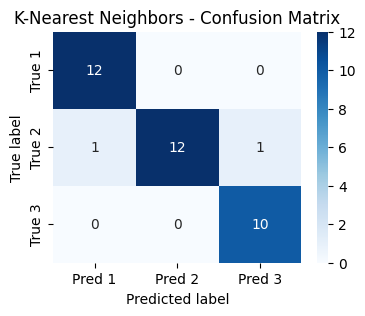


Classification report:
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.86      0.92        14
           3       0.91      1.00      0.95        10

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36



In [11]:
show_metrics(Y_test, knn_pred, "K-Nearest Neighbors")


Random Forest
Accuracy :0.944
Precision : 0.949
Recall    :0.944
F1-score  : 0.944


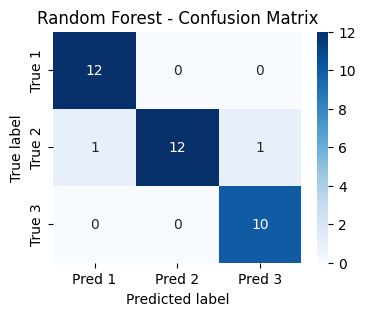


Classification report:
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.86      0.92        14
           3       0.91      1.00      0.95        10

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36



In [12]:
show_metrics(Y_test, rf_pred,"Random Forest")

#### 8. Napisz interpretację wynikającą z analizy metryk - w szczególności z czego może wynikać różnica w działaniu tych dwóch modeli.

Oba modele – K-Nearest Neighbors (KNN) i Random Forest (RF) osiągnęły identyczne wyniki na zbiorze testowym:

- **Accuracy**: 0.944 - Obydwa modele poprawnie sklasyfikowały 94,4% obserwacji testowych, co oznacza, że są równie skuteczne pod względem ogólnej liczby poprawnych predykcji.

- **Precision**: 0.949 - Średnia precyzja wynosi 0.95 dla obu modeli, co oznacza, że większość próbek sklasyfikowanych jako dana klasa rzeczywiście do niej należy. Precyzja dla klasy 2 jest najwyższa (1.00), natomiast najniższa dla klasy 3 (0.91).

- **Recall**: 0.944 - Średnia czułość to 0.94. Dla klasy 2 recall jest niższy (0.86), co sugeruje, że oba modele mają większą trudność z prawidłowym wykrywaniem wszystkich przypadków klasy 2.

- **F1-score**: 0.944 - F1-score jest zbalansowany i równy 0.94 dla obu modeli. Oznacza to, że kompromis pomiędzy precyzją a recall jest bardzo dobry.

- **Confusion Matrix**:
    - w obu przypadkach macierze wyglądają identycznie
    - dla kalsy 1: wszystkie 12 próbek klasy 1 zostały poprawnie sklasyfikowane (12 w lewym górnym rogu). Model nie pomylił ani jednej próbki klasy 1 z żadną inną klasą.
    - dla klasy 2: 12 próbek klasy 2 zostało poprawnie sklasyfikowanych, 1 próbka klasy 2 została błędnie zaklasyfikowana jako klasa 1, 1 próbka klasy 2 została błędnie zaklasyfikowana jako klasa 3, to wskazuje, że model czasem myli klasę 2 z klasą 1 lub 3.
    - dla klasy 3: wszystkie 10 próbek klasy 3 zostały poprawnie sklasyfikowane, nie było żadnej pomyłki z innymi klasami.
    - Taka macierz pomyłek świadczy o tym, że model radzi sobie świetnie z rozpoznawaniem większości klas, a problematyczne są tylko przypadki, gdzie klasy mogą mieć podobne cechy.

 
Wyniki **raportu klasyfikacji** wskazują, że model osiągnął bardzo dobrą skuteczność na zbiorze testowym – dokładność (accuracy) wyniosła 0.94, co oznacza, że 94% próbek zostało poprawnie sklasyfikowanych. Wartości średnie precyzji, recall oraz f1-score zarówno dla średniej arytmetycznej (macro avg), jak i ważonej (weighted avg), są bardzo wysokie i oscylują wokół 0.94–0.95, co świadczy o zrównoważonej skuteczności modelu dla wszystkich klas. Analizując wyniki szczegółowe dla poszczególnych klas:

- Klasa 1 została sklasyfikowana bezbłędnie pod względem recall (wszystkie rzeczywiste próbki tej klasy zostały poprawnie rozpoznane), przy bardzo wysokiej precyzji (0.92).

- Klasa 2 charakteryzuje się perfekcyjną precyzją (1.00), jednak nieco niższym recall (0.86), co oznacza, że część próbek należących do tej klasy została błędnie przypisana do innej klasy.

- Klasa 3 również została bardzo dobrze rozpoznana (precyzja 0.91, recall 1.00).

Ogólnie rzecz biorąc, model bardzo dobrze radzi sobie z rozróżnianiem wszystkich klas, a jedyną zauważalną niedoskonałością jest nieco niższy recall dla klasy 2, co sugeruje, że model czasami myli tę klasę z innymi. Niemniej jednak ogólna skuteczność predykcji jest bardzo wysoka, a uzyskane wartości metryk świadczą o dobrym dopasowaniu modelu do danych.


**Z czego może wynikać różnica w działaniu tych dwóch modeli:**
Różnice w działaniu tych dwóch modeli mogą wynikać z ich odmiennego podejścia do klasyfikacji:

**KNN:**

- Opiera się na odległościach w przestrzeni cech — każdy nowy przypadek jest klasyfikowany na podstawie większości klas wśród najbliższych sąsiadów.

- KNN jest bardzo wrażliwy na skalę cech i wymaga ich wcześniejszej normalizacji.

- KNN może mieć problemy, gdy cechy nie są informatywne, a dane są szumne lub nierównomiernie rozłożone.

**Random Forest:**

- To zespół drzew decyzyjnych uczących się na losowych podzbiorach danych i cech.

- Jest bardziej odporny na przeuczenie (overfitting), radzi sobie lepiej przy skomplikowanych zależnościach i niestandardowych rozkładach cech.

- RF nie wymaga normalizacji danych i może lepiej rozpoznawać nieliniowe zależności.

Gdyby jednak dane były bardziej złożone, miały więcej szumu lub bardziej zróżnicowaną strukturę klas, można by oczekiwać, że Random Forest będzie bardziej stabilny i mniej podatny na przypadkowe fluktuacje wynikające z pojedynczych sąsiadów (co czasem dotyczy KNN).

#### 9. DODATKOWO:

#### 9.1. Wykres krzyżowy z podziałem na klasy dla wszystkich zmiennych

Wykres krzyżowy (pairplot) pokazuje relacje pomiędzy wszystkimi parami cech w zbiorze danych oraz rozkłady poszczególnych cech z podziałem na klasy wina. Dzięki temu można zauważyć, które cechy najlepiej rozdzielają klasy (np. różnice w kolorach punktów), a które są mniej informatywne. Widoczne są także zależności i korelacje pomiędzy niektórymi zmiennymi. Dla części cech klasy wyraźnie się rozdzielają, co sugeruje, że są one kluczowe dla klasyfikacji wina. W przypadku innych cech klasy mogą się przenikać, co może utrudniać rozróżnianie.

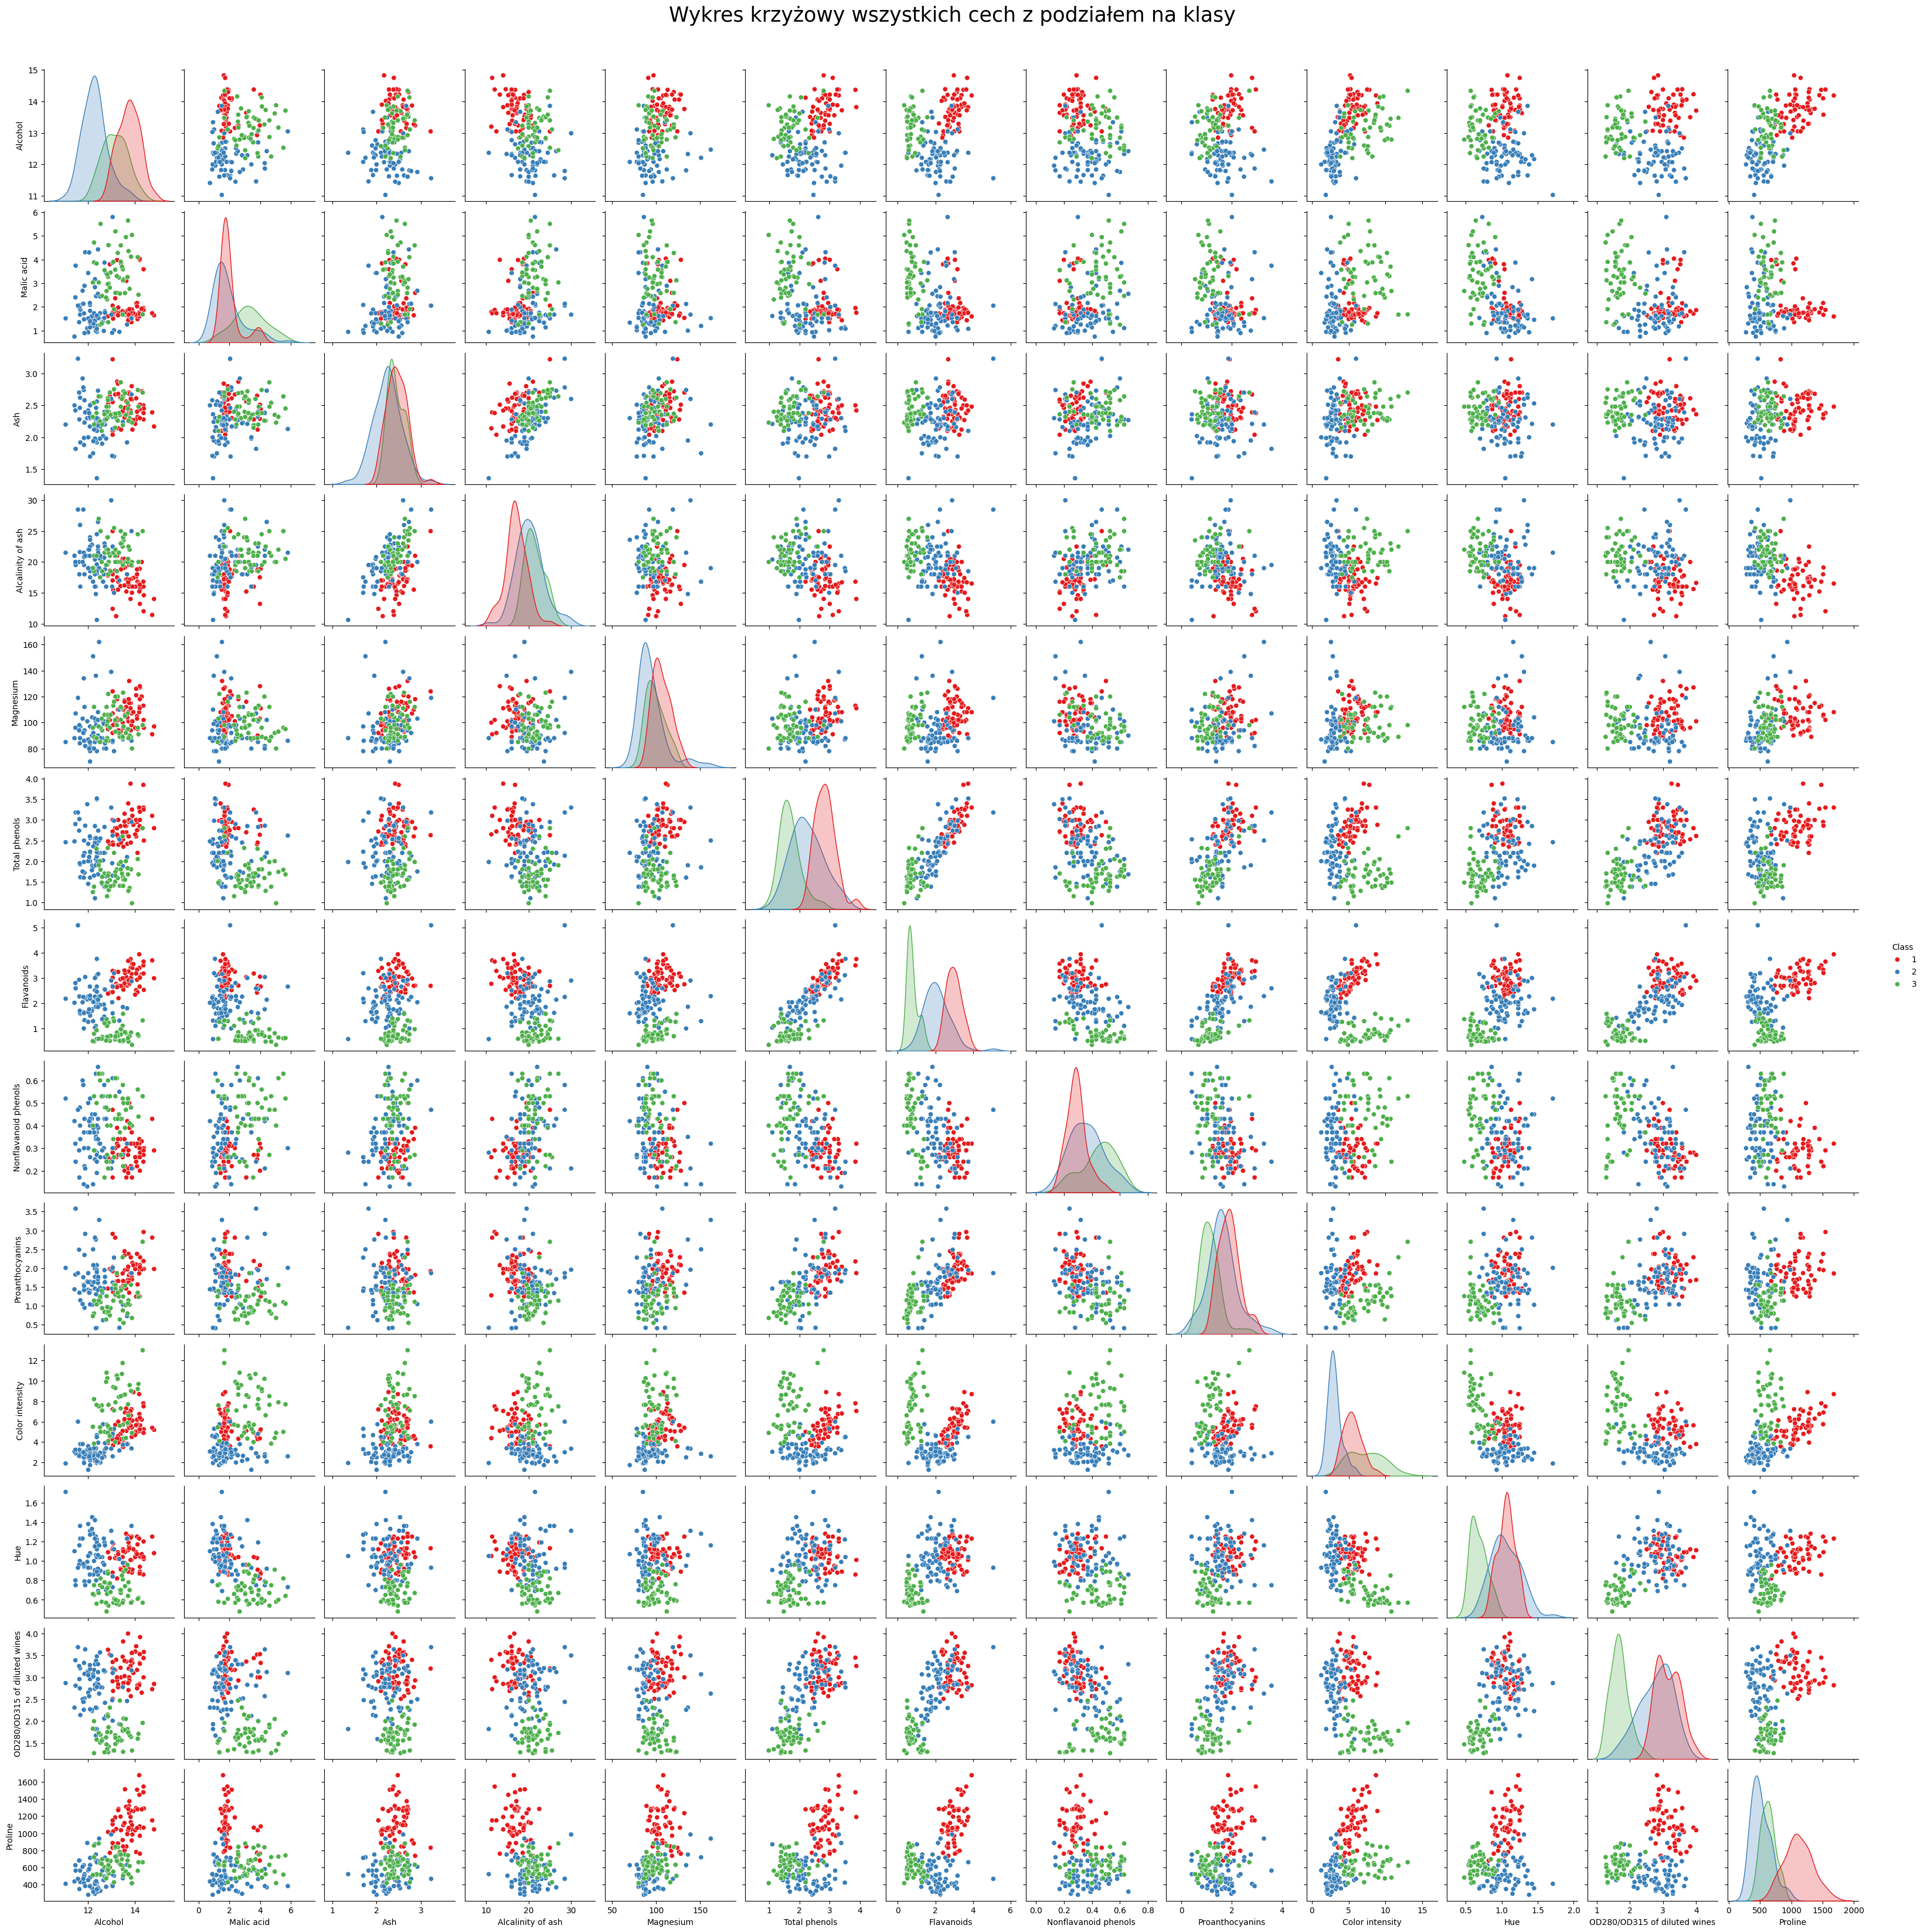

In [13]:
sns.pairplot(df, hue='Class',diag_kind='kde',palette='Set1')
plt.suptitle('Wykres krzyżowy wszystkich cech z podziałem na klasy', 
             y=1.02, size = 25)
plt.show()

#### 9.2. Wykres krzyżowy z podziałem na klasy dla wybranych zmiennych

Ze względu na dużą liczbę cech, wykres krzyżowy wykonany dla wszystkich zmiennych jest mało czytelny i utrudnia interpretację. Dlatego zdecydowałem się dodatkowo wygenerować wykresy tylko dla wybranych, najistotniejszych zmiennych, aby lepiej zobrazować różnice i zależności pomiędzy klasami.

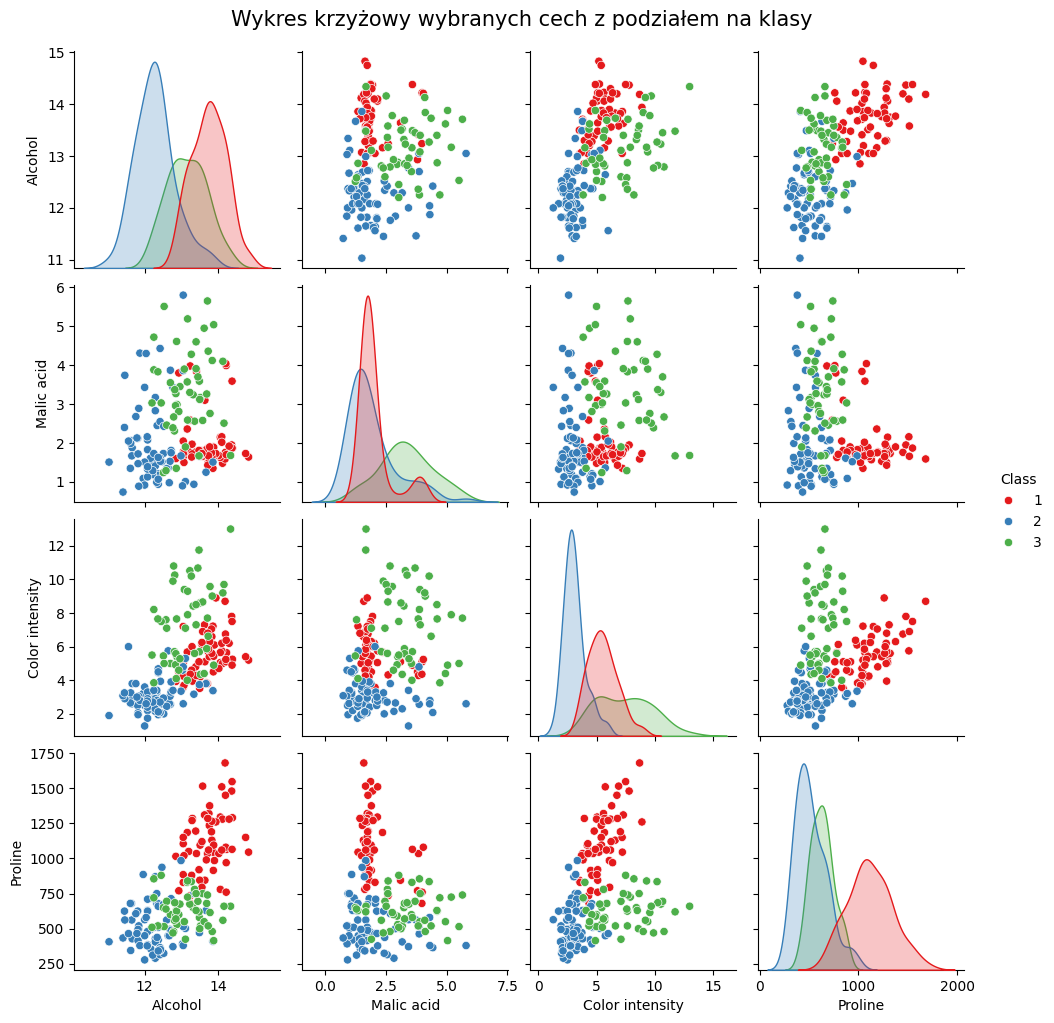

In [14]:
selected_cols = ['Alcohol', 'Malic acid', 
                 'Color intensity', 'Proline', 'Class']

sns.pairplot(df[selected_cols], hue='Class',diag_kind='kde', 
             palette='Set1')
plt.suptitle('Wykres krzyżowy wybranych cech z podziałem na klasy', 
             y=1.02, size = 15)
plt.show()

##### **Interpretacja:**
1. **Alcohol (przekątna)**:
- Klasa 2 (niebieski) ma najwyższy pik przesunięty najbardziej w lewo – najniższa zawartość alkoholu, typowo w zakresie 11.5–13.
- Klasa 3 (zielony) ma środkowy pik – wartości alkoholu głównie między 12 a 13.5.
- Klasa 1 (czerwony) ma pik najbardziej przesunięty w prawo – najwyższa zawartość alkoholu, najczęściej powyżej 13, nawet do 14.
- Wniosek: Zawartość alkoholu najlepiej różnicuje klasę 1 od pozostałych, klasa 2 ma najmniej alkoholu, klasa 1 najwięcej.

2. **Alcohol vs Proline**
- Na wykresie „Alcohol” vs „Proline” widać, że klasa 1 (czerwone) skupia się w prawym górnym rogu – czyli jednocześnie wysokie wartości alkoholu i proliny, co mocno odróżnia je od pozostałych klas.
- Klasa 2 (niebieskie) – lewy dolny róg (mało alkoholu, mało proliny).
- Klasa 3 (zielone) – środek wykresu.
- Wniosek: Im wyższa zawartość alkoholu i proliny, tym większe prawdopodobieństwo, że próbka należy do klasy 1.

3. **Color intensity vs Proline**
- Klasa 1 (czerwona): Punkty w prawym górnym rogu (wysoka intensywność i prolina).
- Klasa 2 (niebieska): Lewy dolny róg (niskie wartości obu cech).
- Klasa 3 (zielona): Środek wykresu.
- Wniosek: Wysoka wartość obu cech mocno wskazuje na klasę 1, natomiast niska/bardzo niska zawartość tych cech wskazuje na klase 2

#### 9.3. Rozkład gęstości prawdopodobieństwa z podziałem na klasy dla wszystkich zmiennych

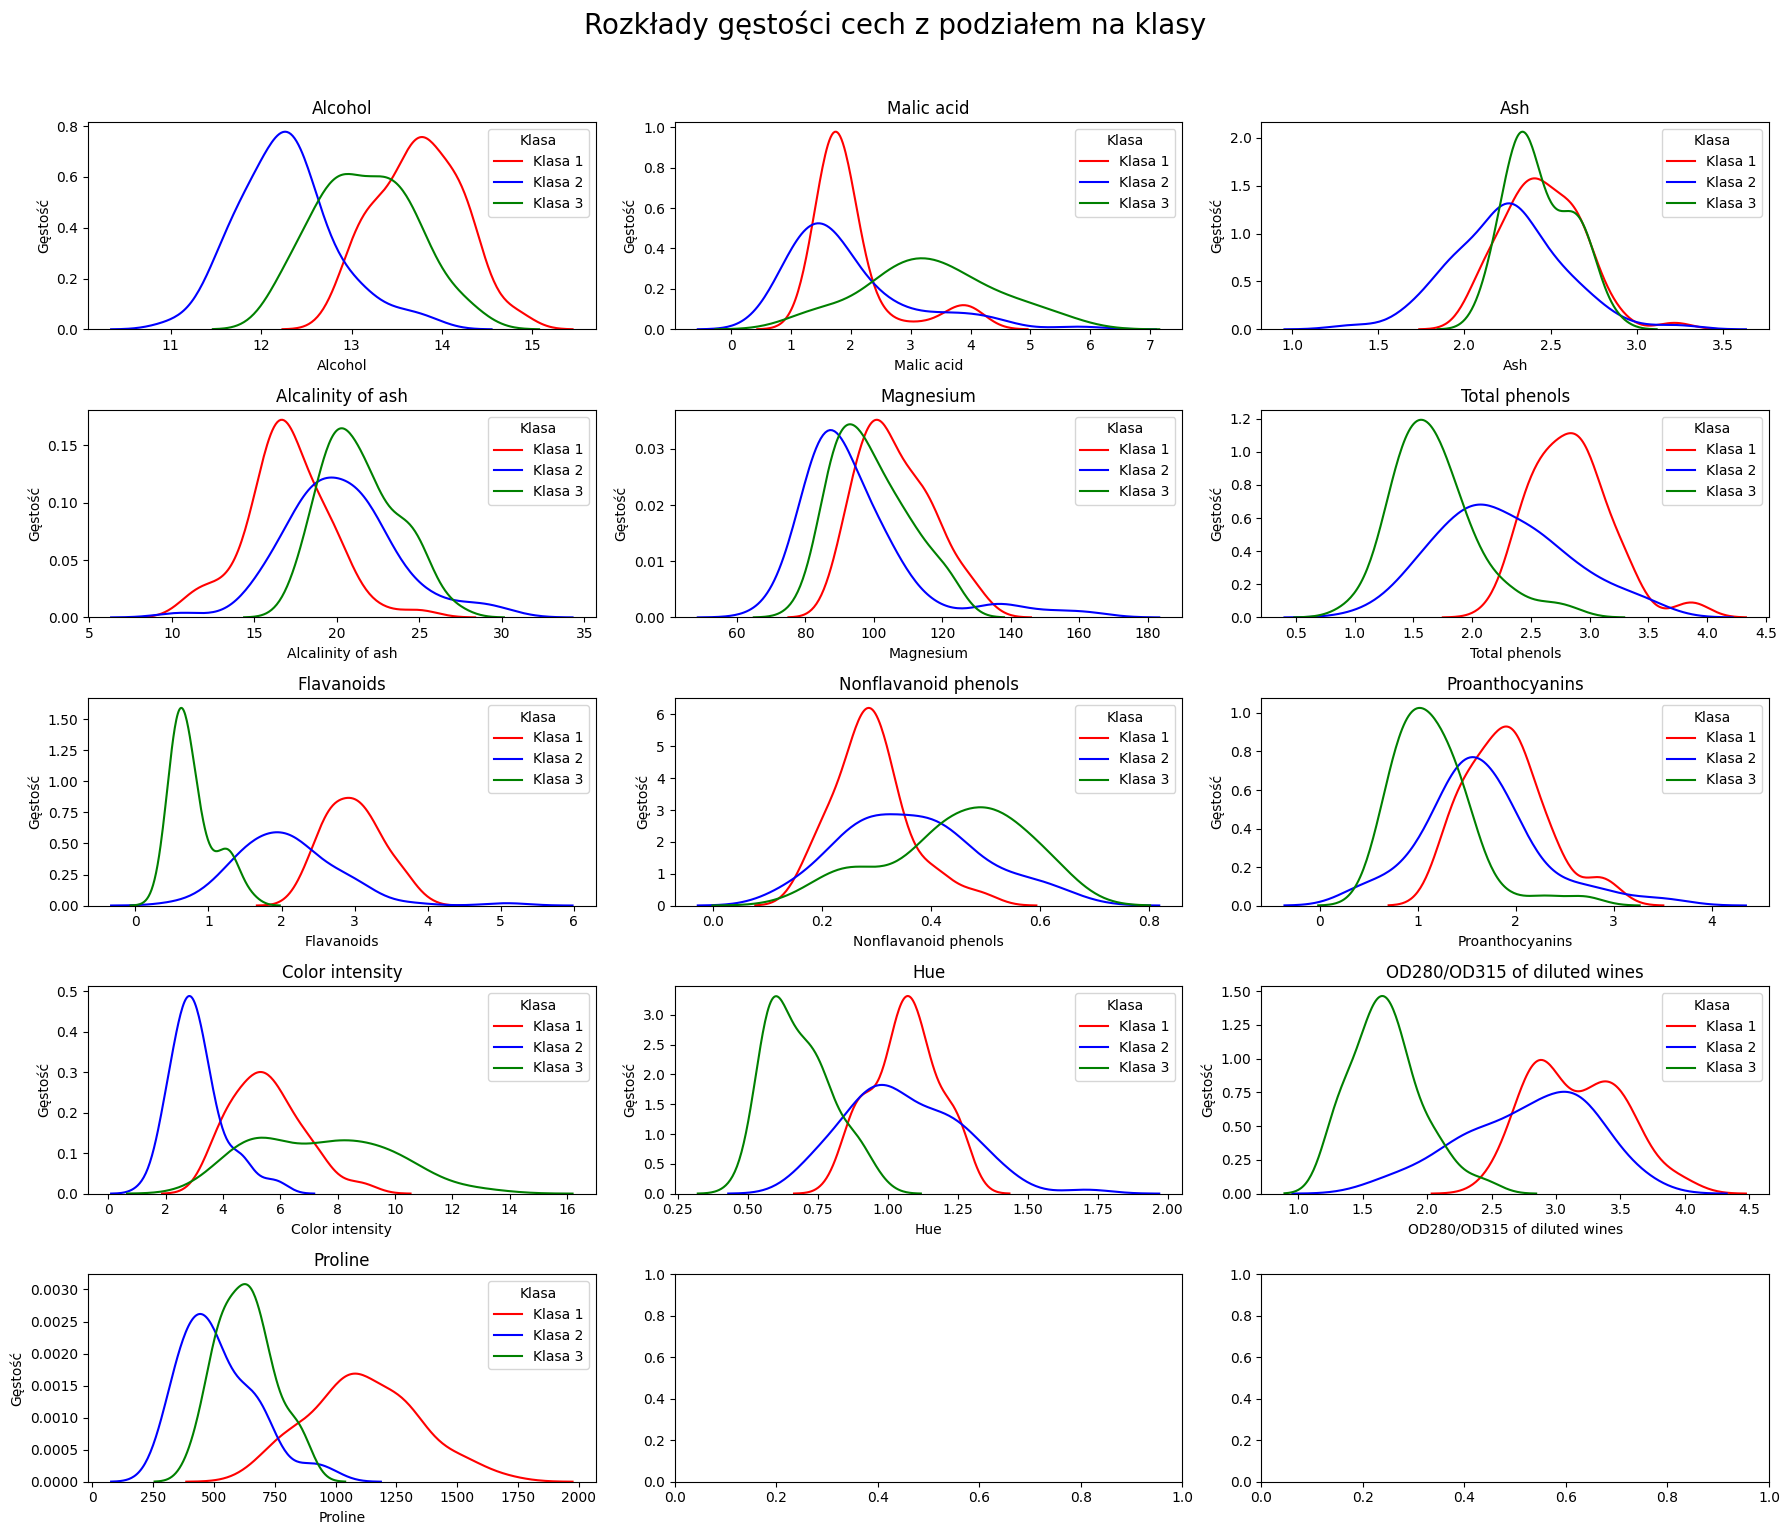

In [15]:
colors = {1: 'red', 2: 'blue', 3: 'green'}  

fig, axes = plt.subplots(5, 3,figsize=(18, 15))
axes = axes.flatten()

#wycinam ze wszystkich zmiennych zmianna "Class"
features = df.drop('Class',axis=1) 

for i, feature in enumerate(features):
    ax = axes[i]
    for label, group in df.groupby('Class'):
        sns.kdeplot(
            group[feature], 
            label=f'Klasa {label}', 
            ax=ax, 
            color=colors[label]
        )
    ax.set_xlabel(feature)
    ax.set_ylabel('Gęstość')
    ax.set_title(feature)
    ax.legend(title='Klasa')

fig.suptitle('Rozkłady gęstości cech z podziałem na klasy', 
             y=1.02, size=20)
plt.tight_layout()
plt.show()



##### **Interpretacja:**
1. **Alcohol**
- Klasa 2 (niebieski) ma najwyższe wartości alkoholu (pik najbardziej przesunięty w prawo).
- Klasa 1 (czerwony) – wartości pośrednie.
- Klasa 3 (zielony) – najniższe wartości alkoholu.

Niektóre cechy bardzo dobrze rozróżniają klasy (np. Alcohol, Flavanoids, Proline, Color intensity), inne są bardziej podobne dla wszystkich klas (Ash, Magnesium, Hue). Cecha z dobrze rozdzielonymi pikami jest potencjalnie dobrym predyktorem klasy.

2. **Ash**
- Rozkłady klas mocno na siebie nachodzą – cecha słabo różnicuje klasy.

3. **Color intensity**
- Klasa 1 (czerwony) ma bardzo niskie wartości (pik blisko zera).
- Klasa 3 (zielony) – najwyższe wartości (pik najbardziej w prawo).
- Klasa 2 (niebieski) – wartości pośrednie.

#### 9.4. Korelacja

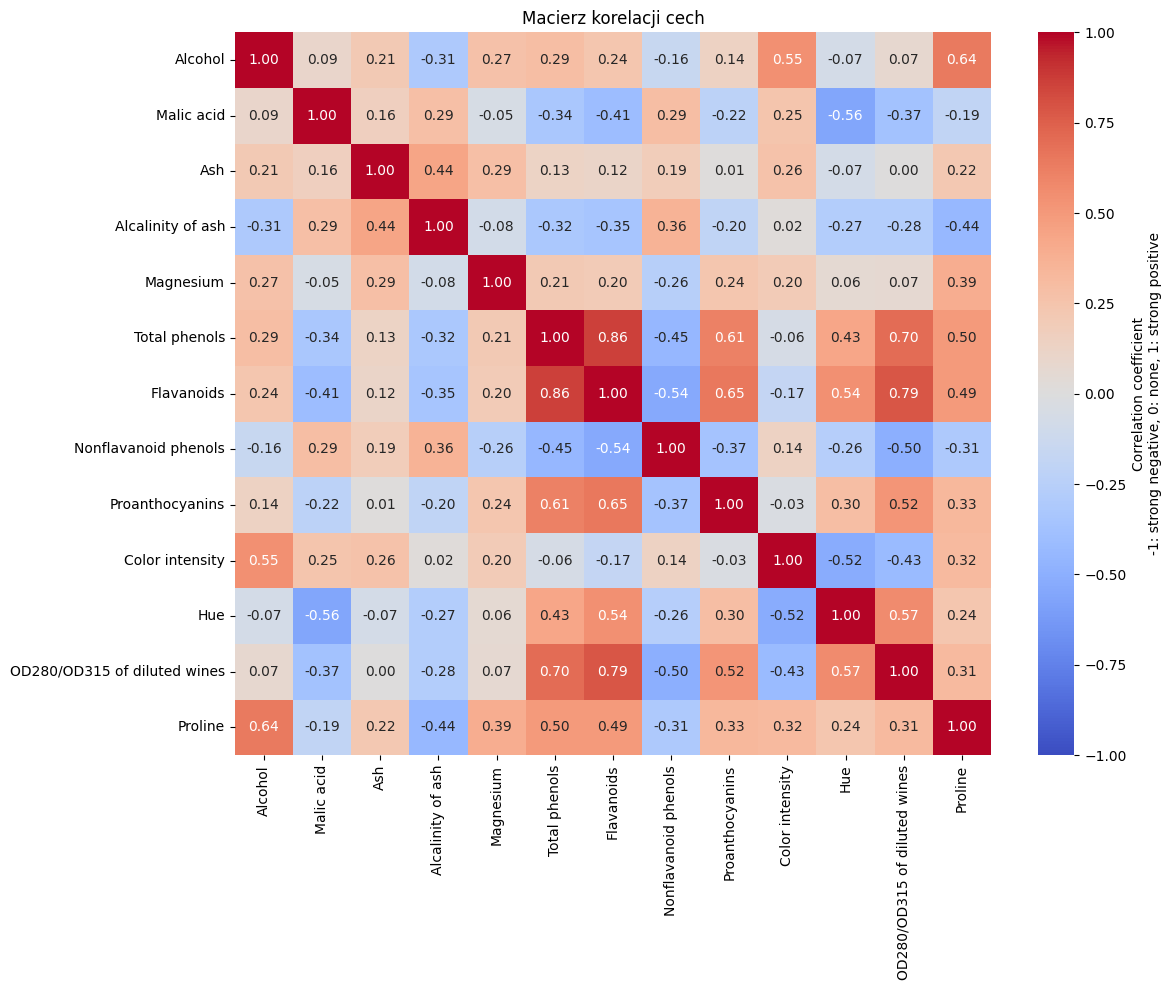

In [16]:
corr_matrix = features.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix,annot=True, fmt=".2f",cmap='coolwarm', vmin=-1, vmax=1, cbar_kws={
        'label': 'Correlation coefficient\n-1: strong negative, 0: none, 1: strong positive'
    })
plt.title('Macierz korelacji cech')
plt.tight_layout()
plt.show()